**Data Cleaning ,Understanding and EDA**

In [74]:
## Impot all the impotant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import pandas as pd

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir('C:\\Users\\Friends\\Downloads')

In [4]:
## Read the dataset ##
tel1 = pd.read_csv('telecom_churn_data.csv')

In [5]:
## Let's look at the datset##

tel1

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


*Dataset contains data of telecom network customers*<br>
*Dataset contains around 1 lakh rows and 226 attributes*<br>
*Dataset contains columns like revenue generated by calls,data,no.of rechages per month etc*<br>
*Dataset contains data for 4 months in which first 2 months are Good Phase, 3rd month is action month and 4th month is churn phase*

In [7]:
##Let's look at the columns33
tel1.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [9]:
## There are lots of columns which seems to be not useful for analysis
## But let's drop them later
## Let's jump to filter high valued customers

**Filtering High Valued Customers**

In [10]:
## Filtering the columns related to recharge
cols1 = tel1.columns
cols2 = cols1[cols1.str.contains('rech')]

In [11]:
## Let's check if there are any NULL values present in the columns related to recharge
nul1 = pd.DataFrame(round(100*((tel1[cols2]).isnull().sum()/len((tel1[cols2]).index)), 2))
nul1

,0
total_rech_num_6,0.00
total_rech_num_7,0.00
total_rech_num_8,0.00
total_rech_num_9,0.00
total_rech_amt_6,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
total_rech_amt_9,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00


In [12]:
## After looking into the data these null values are really because of '0' no.of recharges or 0 amount of recharge.
## We can fill these values with 0

In [13]:
tel1["total_rech_data_6"].fillna(0, inplace = True)
tel1["total_rech_data_7"].fillna(0, inplace = True)
tel1["total_rech_data_8"].fillna(0, inplace = True)
tel1["total_rech_data_9"].fillna(0, inplace = True)
tel1["max_rech_data_6"].fillna(0, inplace = True)
tel1["max_rech_data_7"].fillna(0, inplace = True)
tel1["max_rech_data_8"].fillna(0, inplace = True)
tel1["max_rech_data_9"].fillna(0, inplace = True)
tel1["count_rech_2g_6"].fillna(0, inplace = True)
tel1["count_rech_2g_7"].fillna(0, inplace = True)
tel1["count_rech_2g_8"].fillna(0, inplace = True)
tel1["count_rech_2g_9"].fillna(0, inplace = True)
tel1["count_rech_3g_6"].fillna(0, inplace = True)
tel1["count_rech_3g_7"].fillna(0, inplace = True)
tel1["count_rech_3g_8"].fillna(0, inplace = True)
tel1["count_rech_3g_9"].fillna(0, inplace = True)
tel1["av_rech_amt_data_6"].fillna(0, inplace = True)
tel1["av_rech_amt_data_7"].fillna(0, inplace = True)
tel1["av_rech_amt_data_8"].fillna(0, inplace = True)
tel1["av_rech_amt_data_9"].fillna(0, inplace = True)


*Derive new features*

In [14]:
## Now we can derive new features from existing features which are useful for analysis and these are created as per business understanding

In [15]:
## Let's derive total data recharge amount for each month
## Total data recharge amnt is calculated after multiplying 'average data rech amnt' with total data recharges
tel1['total_data_rech_amnt_6'] = (tel1['total_rech_data_6'])*(tel1['av_rech_amt_data_6'])
tel1['total_data_rech_amnt_7'] = (tel1['total_rech_data_7'])*(tel1['av_rech_amt_data_7'])
tel1['total_data_rech_amnt_8'] = (tel1['total_rech_data_8'])*(tel1['av_rech_amt_data_8'])

In [16]:
# Let's derive whole recharge amount for each month
# Whole amount is sum of nomral recharge + Data recharge amount

tel1['whole_rech_6'] = (tel1['total_rech_amt_6'] + tel1['total_data_rech_amnt_6'])
tel1['whole_rech_7'] = (tel1['total_rech_amt_7'] + tel1['total_data_rech_amnt_7'])
tel1['whole_rech_8'] = (tel1['total_rech_amt_8'] + tel1['total_data_rech_amnt_8']) 

In [17]:
## Below is the code to filter high valued customers
## First we will calculate average rech amnt for good phase and filter the customers who are above 70th percentile

tel1['avg_rech_6_7'] = ((tel1['whole_rech_6']) + (tel1['whole_rech_7']))/2

tel2 = tel1[tel1.avg_rech_6_7 > (tel1.avg_rech_6_7.quantile(0.7))]
tel2

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amnt_6,total_data_rech_amnt_7,total_data_rech_amnt_8,whole_rech_6,whole_rech_7,whole_rech_8,avg_rech_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,910.65,122.16,0.00,0.0,354.0,207.0,437.0,955.0,327.0,696.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,718.0,640.0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,51.86,0.00,0.00,0.0,712.0,540.0,0.0,1166.0,979.0,583.0
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,977.020,...,2706.83,1714.67,0.00,5285.0,20424.0,455.0,6343.0,23230.0,910.0,14786.5
38,7000815202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,363.987,...,0.00,0.00,0.00,0.0,0.0,0.0,420.0,636.0,416.0,528.0
41,7000721289,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,482.832,...,0.00,0.00,0.00,0.0,0.0,0.0,496.0,510.0,410.0,503.0
48,7000294396,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1873.271,...,0.00,0.00,0.00,0.0,0.0,0.0,2317.0,580.0,197.0,1448.5
53,7002188521,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,978.077,...,0.00,0.00,0.00,344.0,575.0,23.0,1503.0,1947.0,798.0,1725.0


In [18]:
## We are done filtering high valued customers
## We have got 29953 rows

In [19]:
## Let's derive one more feature
## Let's calculate % change in total rech amounts from good phase to action phase and keep this as new column

tel2['per_change_rech_good_to_act'] = (((tel1['whole_rech_8']) - (tel1['avg_rech_6_7']))/(tel1['avg_rech_6_7']))*100

*Drop few unwanted columns*

In [20]:
## Let's filter out the columns which contains date related fields

cols_d = tel2.columns
cols_date = cols_d[cols_d.str.contains('date')]
cols_date

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [21]:
## Seems nothing to do with the above date fileds so let's drop them
tel3 = tel2.drop(cols_date,axis=1)

## Also let's drop mobile number and circle id cols
tel3.drop(['mobile_number','circle_id'],axis=1,inplace=True)

**Tag Churn and Non churn**

In [22]:
## As per business churners are who haven't done a single recharge in 9th month
## Let's filter out the columns which are related to 9th month
cols_c = tel3.columns
cols_9 = cols_c[cols_c.str.contains('_9')]
cols_9

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user

In [23]:
## Below is the code to tag label to each and all the data points
for i in tel3.index:
  if ((tel3.loc[i,'total_ic_mou_9'] == 0) & (tel3.loc[i,'total_og_mou_9'] == 0) & (tel3.loc[i,'vol_2g_mb_9'] == 0) & (tel3.loc[i,'vol_3g_mb_9'] == 0)):
    tel3.loc[i,'churn'] = 1
  else:
    tel3.loc[i,'churn'] = 0

In [24]:
## Change the 'Churn' column to Int
tel3 = tel3.astype({"churn":'int64'}) 

In [25]:
tel3.churn.sum()

##There are almost 2433 churn cases which is about ~10% of the total

2433

In [26]:
## Now we can drop columns related 9th month as we don't need them anymore for analysis.
tel3.drop(cols_9,axis=1,inplace=True)

In [30]:
## We are done with tagging the labels to the dat points

In [27]:
## Now let's look into the NULL values 
## Let's filter the cols with more than 10% of Null values

nul3 = pd.DataFrame(round(100*(tel3.isnull().sum()/len(tel3.index)), 2))
nul3[(nul3[0]>10)]

,0
arpu_3g_6,44.11
arpu_3g_7,43.12
arpu_3g_8,46.80
arpu_2g_6,44.11
arpu_2g_7,43.12
arpu_2g_8,46.80
night_pck_user_6,44.11
night_pck_user_7,43.12
night_pck_user_8,46.80
fb_user_6,44.11


In [28]:
## Let's look into the above cols once along with realted cols
tel3[['arpu_3g_6','vol_3g_mb_6','arpu_3g_7','vol_3g_mb_7']]

,arpu_3g_6,vol_3g_mb_6,arpu_3g_7,vol_3g_mb_7
0,212.17,83.57,212.17,150.76
7,NaN,0.00,NaN,0.00
8,NaN,0.00,0.00,750.95
21,NaN,0.00,NaN,0.00
23,NaN,0.00,306.57,599.09
33,897.60,3509.90,2294.03,8154.65
38,NaN,0.00,NaN,0.00
41,NaN,0.00,NaN,0.00
48,NaN,0.00,NaN,0.00
53,0.00,0.00,0.00,0.00


In [29]:
## From above we can say that 'arpu' is Null whenver corresponding data recharge is 0
## So we can impute '0' for these columns

In [30]:
##Let's look at how data is varying in these columns
print(tel3.groupby('night_pck_user_6').night_pck_user_6.count())
print(tel3.groupby('night_pck_user_7').night_pck_user_7.count())
print(tel3.groupby('night_pck_user_8').night_pck_user_8.count())
print(tel3.groupby('fb_user_6').fb_user_6.count())
print(tel3.groupby('fb_user_7').fb_user_7.count())
print(tel3.groupby('fb_user_8').fb_user_8.count())

night_pck_user_6
0.0    16333
1.0      407
Name: night_pck_user_6, dtype: int64
night_pck_user_7
0.0    16663
1.0      375
Name: night_pck_user_7, dtype: int64
night_pck_user_8
0.0    15594
1.0      341
Name: night_pck_user_8, dtype: int64
fb_user_6
0.0     1229
1.0    15511
Name: fb_user_6, dtype: int64
fb_user_7
0.0     1333
1.0    15705
Name: fb_user_7, dtype: int64
fb_user_8
0.0     1638
1.0    14297
Name: fb_user_8, dtype: int64


In [28]:
## From above we can say that few columns will not vary much even after imputing '0's. So we can drop them

In [31]:
## From all the above observations we can drop few columns and we can impute values to few
tel3.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1,inplace=True)

tel3['fb_user_6'].fillna(0, inplace = True)
tel3['fb_user_7'].fillna(0, inplace = True)
tel3['fb_user_8'].fillna(0, inplace = True)
tel3['arpu_3g_6'].fillna(0, inplace = True)
tel3['arpu_3g_7'].fillna(0, inplace = True)
tel3['arpu_3g_8'].fillna(0, inplace = True)
tel3['arpu_2g_6'].fillna(0, inplace = True)
tel3['arpu_2g_7'].fillna(0, inplace = True)
tel3['arpu_2g_8'].fillna(0, inplace = True)

In [32]:
## Let's check for the unique values in each column

for i in tel3.columns:
    if (len(tel3[i].unique())) < 3:
      print(i,':-',tel3[i].unique())

loc_og_t2o_mou :- [ 0. nan]
std_og_t2o_mou :- [ 0. nan]
loc_ic_t2o_mou :- [ 0. nan]
std_og_t2c_mou_6 :- [nan  0.]
std_og_t2c_mou_7 :- [nan  0.]
std_og_t2c_mou_8 :- [ 0. nan]
std_ic_t2o_mou_6 :- [nan  0.]
std_ic_t2o_mou_7 :- [nan  0.]
std_ic_t2o_mou_8 :- [ 0. nan]
fb_user_6 :- [1. 0.]
fb_user_7 :- [1. 0.]
fb_user_8 :- [1. 0.]
churn :- [1 0]


In [31]:
## From above observation we can drop few columns

In [33]:
tel4 = tel3.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [34]:
## Now again look at the Null values

nul3 = pd.DataFrame(round(100*(tel3.isnull().sum()/len(tel3.index)), 2))

nul3[(nul3[0]>0)]

,0
loc_og_t2o_mou,0.74
std_og_t2o_mou,0.74
loc_ic_t2o_mou,0.74
onnet_mou_6,1.81
onnet_mou_7,1.79
onnet_mou_8,3.91
offnet_mou_6,1.81
offnet_mou_7,1.79
offnet_mou_8,3.91
roam_ic_mou_6,1.81


In [35]:
## Let's drop the null valued rows now

tel5 = tel4.dropna(inplace=False)

In [36]:
tel5.churn.sum()

1588

In [37]:
## Let's look at the data types 

tel5.dtypes

arpu_6                         float64
arpu_7                         float64
arpu_8                         float64
onnet_mou_6                    float64
onnet_mou_7                    float64
onnet_mou_8                    float64
offnet_mou_6                   float64
offnet_mou_7                   float64
offnet_mou_8                   float64
roam_ic_mou_6                  float64
roam_ic_mou_7                  float64
roam_ic_mou_8                  float64
roam_og_mou_6                  float64
roam_og_mou_7                  float64
roam_og_mou_8                  float64
loc_og_t2t_mou_6               float64
loc_og_t2t_mou_7               float64
loc_og_t2t_mou_8               float64
loc_og_t2m_mou_6               float64
loc_og_t2m_mou_7               float64
loc_og_t2m_mou_8               float64
loc_og_t2f_mou_6               float64
loc_og_t2f_mou_7               float64
loc_og_t2f_mou_8               float64
loc_og_t2c_mou_6               float64
loc_og_t2c_mou_7         

In [37]:
## All are numerical columns

*As we have less churn cases(Class imbalance), We are not removing any outliers for now as it may remove churn cases*

*Check for the collinearity in cols*

In [38]:
## Below is the code to sort out the columns with high collinearity.

corr1 = tel5.corr()
for i in corr1.index:
    for j in corr1.columns:
        if ((i != j) and ((corr1.loc[i,j] > 0.65) or (corr1.loc[i,j] < -0.65))):
            print('Correlation between',i,'&',j,'is  ',corr1.loc[i,j])

Correlation between arpu_6 & arpu_7 is   0.7175601380537725
Correlation between arpu_6 & arpu_8 is   0.6636753884424469
Correlation between arpu_6 & total_rech_amt_6 is   0.9435388955759192
Correlation between arpu_6 & total_rech_amt_7 is   0.6994730009725084
Correlation between arpu_6 & total_rech_amt_8 is   0.6516183604110752
Correlation between arpu_7 & arpu_6 is   0.7175601380537725
Correlation between arpu_7 & arpu_8 is   0.7699898584337138
Correlation between arpu_7 & total_rech_amt_6 is   0.7191490372438231
Correlation between arpu_7 & total_rech_amt_7 is   0.9441052193716698
Correlation between arpu_7 & total_rech_amt_8 is   0.7648200562572051
Correlation between arpu_8 & arpu_6 is   0.6636753884424469
Correlation between arpu_8 & arpu_7 is   0.7699898584337138
Correlation between arpu_8 & total_rech_amt_6 is   0.6563584165047229
Correlation between arpu_8 & total_rech_amt_7 is   0.7655305571005004
Correlation between arpu_8 & total_rech_amt_8 is   0.9539870081162468
Correlatio

Correlation between loc_ic_mou_8 & loc_ic_t2m_mou_7 is   0.7082250591846029
Correlation between loc_ic_mou_8 & loc_ic_t2m_mou_8 is   0.8451319835451905
Correlation between loc_ic_mou_8 & loc_ic_mou_6 is   0.751673854111551
Correlation between loc_ic_mou_8 & loc_ic_mou_7 is   0.8447556181141423
Correlation between loc_ic_mou_8 & total_ic_mou_6 is   0.6757063858244736
Correlation between loc_ic_mou_8 & total_ic_mou_7 is   0.744903179889486
Correlation between loc_ic_mou_8 & total_ic_mou_8 is   0.8939035436223631
Correlation between std_ic_t2t_mou_6 & std_ic_t2t_mou_7 is   0.7511566692463634
Correlation between std_ic_t2t_mou_6 & std_ic_mou_6 is   0.6854253214665875
Correlation between std_ic_t2t_mou_7 & std_ic_t2t_mou_6 is   0.7511566692463634
Correlation between std_ic_t2t_mou_7 & std_ic_t2t_mou_8 is   0.7100194743527981
Correlation between std_ic_t2t_mou_7 & std_ic_mou_7 is   0.6893659245016951
Correlation between std_ic_t2t_mou_8 & std_ic_t2t_mou_7 is   0.7100194743527981
Correlation 

Correlation between vol_3g_mb_6 & av_rech_amt_data_6 is   0.746319771952224
Correlation between vol_3g_mb_6 & vol_3g_mb_7 is   0.6863967610248168
Correlation between vol_3g_mb_6 & arpu_3g_6 is   0.7457896138511634
Correlation between vol_3g_mb_6 & arpu_2g_6 is   0.7361218944694515
Correlation between vol_3g_mb_6 & jun_vbc_3g is   0.6627301158473898
Correlation between vol_3g_mb_7 & av_rech_amt_data_7 is   0.7674495772624507
Correlation between vol_3g_mb_7 & vol_3g_mb_6 is   0.6863967610248168
Correlation between vol_3g_mb_7 & vol_3g_mb_8 is   0.7294764413536207
Correlation between vol_3g_mb_7 & arpu_3g_7 is   0.7793271575563926
Correlation between vol_3g_mb_7 & arpu_2g_7 is   0.7702244781344271
Correlation between vol_3g_mb_7 & monthly_3g_7 is   0.6504194508807114
Correlation between vol_3g_mb_7 & jul_vbc_3g is   0.651356943234521
Correlation between vol_3g_mb_8 & av_rech_amt_data_8 is   0.7740178453445177
Correlation between vol_3g_mb_8 & vol_3g_mb_7 is   0.7294764413536207
Correlatio

In [39]:
## Seems there are good number of columns with high correlation.
## Let PCA take care of these

**Data processing for Model building**

In [39]:
## Filter out output label

y = tel5.churn
tel5.drop('churn',axis=1,inplace=True)

*We first divide the Train and Test data and then apply Standardization*<br>
*This is to avoid leakage of test data into model building data*<br>
*Also to avoid the effect of Test data on Train Data*

In [40]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(tel5, y, train_size=0.8, test_size=0.2, random_state=45)

*Standardization of Train data*

In [41]:
## Let's scale the Train data with mean of '0' and standard deviation of 1

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train1 = standard_scaler.fit_transform(X_train1)

In [42]:
## Let's change the standardized data to a dataframe

X_train1 = pd.DataFrame(X_train1)
X_train1.columns = tel5.columns
X_train1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amnt_6,total_data_rech_amnt_7,total_data_rech_amnt_8,whole_rech_6,whole_rech_7,whole_rech_8,avg_rech_6_7,per_change_rech_good_to_act
0,0.528342,0.181235,0.246299,0.929599,0.660547,0.645914,0.847364,0.285200,0.264164,1.161661,...,-0.377220,-0.154293,-0.305633,-0.347003,-0.264677,-0.095641,-0.302751,-0.088575,-0.238021,0.102018
1,-0.817382,-0.690035,-0.733682,-0.576602,-0.571271,-0.487301,-0.642667,-0.674273,-0.562043,-0.211701,...,-0.025905,-0.154293,1.096619,0.485049,0.068507,0.703384,0.214746,-0.171884,0.532246,-0.552244
2,-0.592861,-0.172408,0.111048,-0.496343,-0.147091,-0.133946,0.939127,1.895045,1.818064,-0.163931,...,-0.377220,-0.154293,-0.305633,-0.347003,-0.278312,-0.363034,-0.364089,-0.164360,-0.428064,0.351212
3,-0.208158,-0.299970,0.009757,-0.415409,-0.378596,-0.266999,0.445649,0.140001,0.456935,-0.211701,...,-0.377220,-0.154293,0.092537,0.195469,0.062578,0.013460,0.059318,0.073208,0.043617,0.002047
4,-0.820726,-0.339950,-0.169419,-0.576950,-0.568964,-0.519896,-0.799148,-0.735639,-0.718859,-0.211701,...,-0.377220,-0.154293,-0.168524,0.779215,0.191228,-0.425468,0.583961,0.060846,0.110330,-0.079715


*Transform the Test data*

In [43]:
# Let's apply the above standard scaler which used for train data and transform test data

X_test1 = standard_scaler.transform(X_test1)
X_test1 = pd.DataFrame(X_test1)
X_test1.columns = tel5.columns
X_test1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,total_data_rech_amnt_6,total_data_rech_amnt_7,total_data_rech_amnt_8,whole_rech_6,whole_rech_7,whole_rech_8,avg_rech_6_7,per_change_rech_good_to_act
0,-0.155712,0.088455,-0.002577,-0.144113,-0.153577,-0.334310,0.235963,0.734503,0.849688,-0.211701,...,-0.377220,-0.154293,-0.305633,-0.347003,-0.278312,-0.286096,-0.256897,-0.267557,-0.319159,-0.169773
1,0.232496,0.119355,0.361520,1.932173,1.842269,1.852154,-0.162385,-0.194516,-0.070063,-0.211701,...,-0.377220,-0.154293,-0.305633,-0.347003,-0.263491,-0.183301,-0.309302,-0.111149,-0.292113,0.152748
2,-0.705766,-1.009334,-0.415760,-0.579780,-0.571271,-0.515118,-0.791992,-0.778721,-0.673147,-0.211701,...,1.130491,-0.154293,0.305125,-0.282797,0.136685,0.045623,-0.598719,0.002798,-0.336469,0.535060
3,3.023498,0.997439,1.673469,-0.097094,0.676553,0.184245,0.698481,0.737391,-0.093103,-0.211701,...,2.871946,-0.154293,3.147023,-0.181903,2.573313,3.898855,0.108745,2.847698,2.295280,0.438619
4,-0.268765,-0.355807,-0.059107,-0.333060,-0.369679,-0.326815,-0.287865,-0.381304,-0.213882,-0.168824,...,-0.377220,-0.154293,-0.305633,-0.347003,-0.278312,-0.371863,-0.441505,-0.276694,-0.479992,0.142285


**PCA**

*Let's apply PCA on standadized data*<br>
*Here also we will apply PCA on Train data first and then Transform Test data with the same PCA model*<br>
*This is to avoid the effect of Test data on Train Data*

In [44]:
## Import PCA

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=52)

In [45]:
## Let's fit our dataset into Principle components

pca.fit(X_train1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=52,
  svd_solver='randomized', tol=0.0, whiten=False)

In [47]:
## Let's find how much variance is explained by each pricniple component 

pca.explained_variance_ratio_

array([1.19898890e-01, 9.29746028e-02, 6.78689518e-02, 5.46505574e-02,
       3.73239011e-02, 3.37968108e-02, 2.80324534e-02, 2.57588620e-02,
       2.46695729e-02, 2.36182224e-02, 2.17758144e-02, 2.02162169e-02,
       1.82553761e-02, 1.80315888e-02, 1.72320018e-02, 1.70988872e-02,
       1.64246381e-02, 1.55221343e-02, 1.38632448e-02, 1.34894895e-02,
       1.31547769e-02, 1.22920075e-02, 1.17064052e-02, 1.07617465e-02,
       1.00302398e-02, 9.82102386e-03, 9.06963185e-03, 8.40060261e-03,
       7.97668499e-03, 7.72970532e-03, 7.46808377e-03, 6.99745763e-03,
       6.89167117e-03, 6.74913709e-03, 6.45700651e-03, 6.08216771e-03,
       5.99890241e-03, 5.90646710e-03, 5.81954305e-03, 5.65172700e-03,
       5.31113922e-03, 5.25513717e-03, 5.11632643e-03, 5.05673851e-03,
       4.93591815e-03, 4.83236903e-03, 4.61389397e-03, 4.18674362e-03,
       4.11275624e-03, 4.01857580e-03, 3.70275210e-03, 3.60874319e-03,
       3.42131883e-03, 3.14187347e-03, 3.08474126e-03, 3.06157439e-03,
      

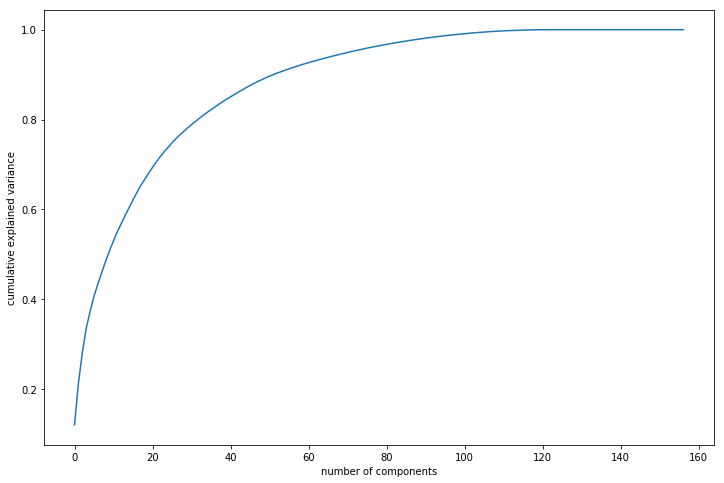

In [48]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [49]:
#Using incremental PCA for efficiency - In our case '70' is good no of principle components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

In [50]:
##Fit our data into the selected incremental PCA

tel_pca = pca_final.fit_transform(X_train1)
tel_pca.shape

(22768, 55)

In [51]:
## Let's look at how our principle components are explaining the variance

pca_final.explained_variance_ratio_

array([0.11989809, 0.09297241, 0.0678673 , 0.05464926, 0.03731589,
       0.03376479, 0.02802317, 0.02575379, 0.02464591, 0.0235994 ,
       0.02174476, 0.02019254, 0.01823776, 0.01801329, 0.01721429,
       0.01704891, 0.01641314, 0.01549982, 0.01381143, 0.01347582,
       0.01312241, 0.01189914, 0.01160578, 0.01075174, 0.00989454,
       0.00967515, 0.00891022, 0.00828949, 0.00785569, 0.00767904,
       0.00717185, 0.00695046, 0.00686143, 0.00670065, 0.00631635,
       0.00597038, 0.00594302, 0.00583134, 0.00562866, 0.00556294,
       0.00526686, 0.00517763, 0.00505488, 0.00488202, 0.00476581,
       0.00460834, 0.00455515, 0.0041172 , 0.00407201, 0.00385521,
       0.00356138, 0.00343358, 0.00303054, 0.00274279, 0.00269005])

In [52]:
(pca_final.explained_variance_ratio_).sum()

0.9045755224852582

In [56]:
## 90% of the variance is being explained by PC's which is pretty good

In [53]:
## Let's add column names to the datset

tel_p1 = pd.DataFrame(tel_pca)
tel_p1.columns = ['pca1','pca2',
'pca3',
'pca4',
'pca5',
'pca6',
'pca7',
'pca8',
'pca9',
'pca10',
'pca11',
'pca12',
'pca13',
'pca14',
'pca15',
'pca16',
'pca17',
'pca18',
'pca19',
'pca20',
'pca21',
'pca22',
'pca23',
'pca24',
'pca25',
'pca26',
'pca27',
'pca28',
'pca29',
'pca30',
'pca31',
'pca32',
'pca33',
'pca34',
'pca35',
'pca36',
'pca37',
'pca38',
'pca39',
'pca40',
'pca41',
'pca42',
'pca43',
'pca44',
'pca45',
'pca46',
'pca47',
'pca48',
'pca49',
'pca50',
'pca51',
'pca52',
'pca53',
'pca54',
'pca55']

In [54]:
tel_p1

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55
0,-3.666478,-0.083088,2.282435,-1.645421,-0.503173,0.603341,-0.658244,-1.218136,0.563328,0.022247,...,0.105710,-0.187425,-0.240041,0.240331,0.333600,0.252472,0.274807,0.034167,-0.097336,-0.088436
1,3.110601,-4.901405,0.518785,3.067212,-0.132429,1.001693,-0.504555,0.392915,-0.979006,-1.558397,...,-0.363530,0.073311,1.165781,1.170606,-0.216156,0.141562,-0.230580,0.026197,0.286118,0.051807
2,-4.295324,-0.621928,3.329446,-1.571299,-0.019488,0.092395,3.630753,1.307665,-0.095813,0.421656,...,1.400251,-0.015397,0.343541,-0.045703,0.318444,0.082720,0.000027,-0.104736,0.065260,-0.057756
3,-0.617787,-0.621970,-0.944422,5.113879,-1.461775,0.741313,1.011533,-0.518243,0.747654,-1.029016,...,-0.144771,-0.353572,0.033003,0.053087,0.007518,-0.143529,0.279476,-0.235490,0.143395,-0.141698
4,4.810986,-4.231667,-1.010596,-1.026785,0.497550,2.440705,-3.198734,8.753952,-1.939757,-1.894238,...,-0.338621,-0.763452,0.281809,0.301235,-0.109153,0.036365,-1.263147,0.889588,1.568982,2.271393
5,-0.667093,0.651264,-0.334778,-1.950586,2.627291,0.374839,-2.101372,-1.969039,0.026538,-0.152609,...,-0.897707,1.343688,1.229398,0.651404,-0.356858,-1.164437,-0.440985,0.281528,0.114706,0.362417
6,2.941424,-3.746502,0.603456,2.498656,-0.385250,1.088779,-0.417041,1.618399,1.200809,0.318336,...,0.058399,0.399231,-0.089930,0.043456,-0.165803,0.218681,-0.396177,-0.316538,-0.276785,0.143520
7,-3.263050,0.701815,0.578210,-0.002022,1.433143,1.330636,1.887644,-0.118179,0.570235,0.804023,...,-0.196129,0.110195,1.031817,-0.909878,0.051918,-0.589666,-0.274055,0.066253,0.091896,-0.326605
8,2.170785,-4.605409,1.089969,4.518619,-0.472150,1.599259,-0.533548,1.407645,1.091696,-0.482106,...,0.022353,0.058895,-0.153468,-0.280804,0.201576,-0.151864,0.464619,-0.060828,0.013202,0.202113
9,1.967017,1.272063,-3.017395,-3.259279,-0.316639,2.091894,-1.137223,-0.285386,-0.606792,-2.181315,...,0.152926,1.663971,0.957332,1.248729,-0.473892,0.222886,0.865176,0.179027,0.638190,0.679609


In [55]:
## Below is the code to sort out the columns with high collinearity after PCA.

corr2 = tel_p1.corr()
for i in corr2.index:
    for j in corr2.columns:
        if ((i != j) and ((corr2.loc[i,j] > 0.65) or (corr2.loc[i,j] < -0.65))):
            print('Correlation between',i,'&',j,'is  ',corr2.loc[i,j])

In [60]:
## Great, We do not see high correlation between Principle components

*Now let's Transform Test set to principle components*

In [56]:
tel_pca_test = pca_final.transform(X_test1)
tel_pca_test.shape

(5692, 55)

In [57]:
tel_pca_test

array([[-3.10293623e+00,  8.29988893e-01, -1.86276595e+00, ...,
         4.04400153e-02, -2.79937245e-01,  2.39616673e-01],
       [-4.42888917e+00, -3.04525097e-02,  3.46035239e+00, ...,
        -2.38908997e-01,  3.84114971e-03, -4.12717188e-02],
       [ 3.65018823e+00, -2.71207725e+00, -9.69760397e-01, ...,
        -1.24061624e-01, -1.05344231e-01, -3.56616334e-03],
       ...,
       [ 1.68181384e-01, -4.65494348e+00, -8.49549598e-01, ...,
         3.37765798e-01,  7.06430435e-02, -9.09985865e-02],
       [-3.56655398e+00,  4.54117969e+00, -5.10919189e+00, ...,
        -2.47418916e-01,  5.19704487e-01, -1.94620879e-01],
       [ 2.73477670e+00, -2.00522349e+00, -1.34851632e+00, ...,
        -9.73294845e-01,  2.49357637e-01,  3.80061740e-02]])

In [58]:
## Add column names to the test set

tel_p2 = pd.DataFrame(tel_pca_test)
tel_p2.columns = ['pca1','pca2',
'pca3',
'pca4',
'pca5',
'pca6',
'pca7',
'pca8',
'pca9',
'pca10',
'pca11',
'pca12',
'pca13',
'pca14',
'pca15',
'pca16',
'pca17',
'pca18',
'pca19',
'pca20',
'pca21',
'pca22',
'pca23',
'pca24',
'pca25',
'pca26',
'pca27',
'pca28',
'pca29',
'pca30',
'pca31',
'pca32',
'pca33',
'pca34',
'pca35',
'pca36',
'pca37',
'pca38',
'pca39',
'pca40',
'pca41',
'pca42',
'pca43',
'pca44',
'pca45',
'pca46',
'pca47',
'pca48',
'pca49',
'pca50',
'pca51',
'pca52',
'pca53',
'pca54',
'pca55']

*So final Train set is 'tel_p1'*<br>
*Final Test set is 'tel_p2'*<br>

**Model building**

***Logistic Regression***

*To avoid class imbalance problem we use class_weight= balanced going forward*<br>
*We use Logistic regression from SKlearn to build our model*<br>
*Let's leave about 'P' values for this time and build the model with all the columns obtained*<br>
*Let's consider all the columns which resulted after PCA for model building*<br>
*We use **'Class_weight=balanced'** to manage class imbalance.*

In [59]:
## As we did PCA Indexes of Train and Test sets are reset. So let's reset Indexes even for Y_train and Y_test

Y_train1 = Y_train1.reset_index(drop = True) 
Y_test1 = Y_test1.reset_index(drop = True) 

In [414]:
from sklearn.linear_model import LogisticRegression

In [435]:
#training the regression model
model1 = LogisticRegression(class_weight='balanced')
model_a = model1.fit(tel_p1,Y_train1)

In [436]:
## Let's predict on the Train set with the built model

Y_train_pred = model_a.predict_proba(tel_p1)[:,1]

In [437]:
## Let's create a dataframe with actual churn status and predicted churn probability

Y_train_pred_final = pd.DataFrame({'Churned':Y_train1.values, 'Churn_Prob':Y_train_pred}) 
Y_train_pred_final.head()

,Churned,Churn_Prob
0,0,0.696315
1,0,0.312245
2,0,0.463930
3,0,0.068230
4,0,0.061245


*Let's draw ROC to evaluate the model*

In [438]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [439]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Churned, Y_train_pred_final.Churn_Prob, drop_intermediate = False )

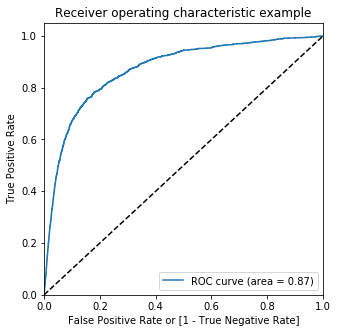

In [440]:
draw_roc(Y_train_pred_final.Churned, Y_train_pred_final.Churn_Prob)

*AUC for our model is 0.87 which is pretty good*

In [421]:
## Let's calculate Accuracy, Precision and few more metrics at variable Prob cutoffs

In [441]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Churned,Churn_Prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.696315,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
1,0,0.312245,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.463930,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.068230,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.061245,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [442]:
# Now let's calculate accuracy sensitivity, specificity and Precision for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','precision'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Churned, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision]
print(cutoff_df)

      prob  accuracy     sensi     speci  precision
0.00  0.00  0.055648  1.000000  0.000000   0.055648
0.05  0.05  0.194132  0.988950  0.147295   0.063971
0.10  0.10  0.295766  0.974743  0.255756   0.071648
0.15  0.15  0.386112  0.964483  0.352030   0.080639
0.20  0.20  0.466883  0.951855  0.438305   0.090793
0.25  0.25  0.537377  0.940016  0.513651   0.102249
0.30  0.30  0.599043  0.920284  0.580113   0.114381
0.35  0.35  0.655833  0.895817  0.641691   0.128408
0.40  0.40  0.706298  0.868193  0.696758   0.144357
0.45  0.45  0.750307  0.835043  0.745314   0.161922
0.50  0.50  0.790495  0.803473  0.789731   0.183788
0.55  0.55  0.826467  0.765588  0.830054   0.209775
0.60  0.60  0.857783  0.727703  0.865448   0.241678
0.65  0.65  0.881983  0.681137  0.893819   0.274317
0.70  0.70  0.902275  0.620363  0.918887   0.310672
0.75  0.75  0.917208  0.544594  0.939166   0.345345
0.80  0.80  0.928760  0.454617  0.956700   0.382216
0.85  0.85  0.936446  0.325967  0.972420   0.410537
0.90  0.90  

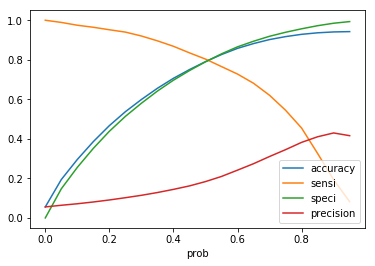

In [443]:
# Let's plot accuracy sensitivity,Precision and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','precision'])
plt.show()

*From above curve we can say that 0.5 is the optimum Probability cutoff*

In [444]:
## Let's do final prediction on train set with this Prob cutoff

Y_train_pred_final['final_predicted'] = Y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

Y_train_pred_final.head()

,Churned,Churn_Prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.696315,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1
1,0,0.312245,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.463930,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0.068230,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.061245,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [445]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Churned, Y_train_pred_final.final_predicted)

0.7904954321855235

In [446]:
## Confusion matrix

confusion2 = metrics.confusion_matrix(Y_train_pred_final.Churned, Y_train_pred_final.final_predicted )
confusion2

array([[16980,  4521],
       [  249,  1018]], dtype=int64)

In [447]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [448]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8034727703235991

In [449]:
# Let us calculate specificity
TN / float(TN+FP)

0.7897307101995256

In [450]:
# Calculate false postive rate - predicting conversion when customer does not have converted as lead
print(FP/ float(TN+FP))

0.2102692898004744


In [433]:
# Positive predictive value / Precision
print (TP / float(TP+FP))

0.18378768730817838


In [434]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9855476231934529


*From above metrics we can conclude below things*<br>
*Accuracy is pretty good*<br>
*Recall is also good so we can predict most of the churn cases without missing*<br>
*But False positive rate is little high which causes the model to predict many Non churn customers also as Churners*

**Test set evaluation**

In [451]:
## Let's predict on Test set

Y_test_pred = model_a.predict_proba(tel_p2)[:,1]

In [452]:
## Let's create a dataframe with actual churn status and predicted churn probability

Y_test_pred_final = pd.DataFrame({'Churned':Y_test1.values, 'Churn_Prob':Y_test_pred}) 
Y_test_pred_final.head()

,Churned,Churn_Prob
0,0,0.189698
1,0,0.309807
2,0,0.108262
3,0,0.026909
4,0,0.176899


In [453]:
## Let's do final prediction on train set with this Prob cutoff

Y_test_pred_final['final_predicted'] = Y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

Y_test_pred_final.head()

,Churned,Churn_Prob,final_predicted
0,0,0.189698,0
1,0,0.309807,0
2,0,0.108262,0
3,0,0.026909,0
4,0,0.176899,0


In [454]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_test_pred_final.Churned, Y_test_pred_final.final_predicted)

0.7865425158116655

In [455]:
## Confusion matrix

confusion2 = metrics.confusion_matrix(Y_test_pred_final.Churned, Y_test_pred_final.final_predicted )
confusion2

array([[4213, 1158],
       [  57,  264]], dtype=int64)

In [456]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [457]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.822429906542056

In [458]:
# Let us calculate specificity
TN / float(TN+FP)

0.7843976913051574

In [459]:
# Calculate false postive rate - predicting conversion when customer does not have converted as lead
print(FP/ float(TN+FP))

0.21560230869484268


In [460]:
# Positive predictive value / Precision
print (TP / float(TP+FP))

0.18565400843881857


In [461]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9866510538641686


*Last but not least. Plot ROC*

In [462]:
fpr, tpr, thresholds = metrics.roc_curve( Y_test_pred_final.Churned, Y_test_pred_final.Churn_Prob, drop_intermediate = False )

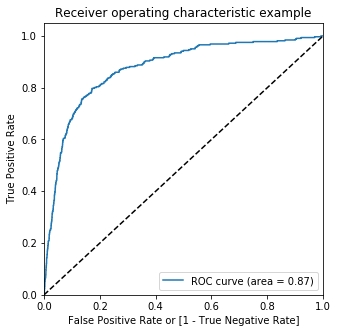

In [463]:
draw_roc(Y_test_pred_final.Churned, Y_test_pred_final.Churn_Prob)

*Not seeing much difference in metrics between Train and Test sets*

*As per business we have achieved good 'Recall'*<br>
*But we are seeing few drawbacks here in logistic model like high False positive rate*<br>
*Let's jump to Random forest and see any difference*

**Random Forest**

*As out data has class imbalance, Hope random forest gonna be the best model as it uses ensemble technique*<br>
*Let's start with somple random forest with default values*<br>
*Also use class_weight argument*

In [503]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
r1 = RandomForestClassifier(class_weight={0:0.05, 1: 0.95})

In [504]:
# fit train set
r1.fit(tel_p1,Y_train1)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [505]:
# Making predictions on train set
pred1 = r1.predict(tel_p1)

In [506]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [507]:
# Let's check the report of our default model
print(classification_report(Y_train1,pred1))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     21501
          1       1.00      0.82      0.90      1267

avg / total       0.99      0.99      0.99     22768



In [508]:
# Printing confusion matrix
con1 = (confusion_matrix(Y_train1,pred1))
con1

array([[21501,     0],
       [  225,  1042]], dtype=int64)

In [509]:
##Accuracy
print(accuracy_score(Y_train1,pred1))

0.9901177090653549


In [510]:
# Making predictions on test set
pred2 = r1.predict(tel_p2)

In [511]:
# Let's check the report of our default model
print(classification_report(Y_test1,pred2))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5371
          1       0.39      0.06      0.10       321

avg / total       0.92      0.94      0.92      5692



In [512]:
# Printing confusion matrix
con2 = (confusion_matrix(Y_test1,pred2))
con2

array([[5343,   28],
       [ 303,   18]], dtype=int64)

In [513]:
print(accuracy_score(Y_test1,pred2))

0.9418482080112438


*From above metrics we can say that model is overfit*<br>
*Let's use Gridsearch CV to tune hyper parameters*<br>
*Also our business objective is to maintain good 'RECALL' score*<br>
*So let's go with hyperparameter tuning*

*Tune Max Depth*

In [521]:
# GridSearchCV to find optimal Max depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 50, 5)}
scoring = {'Accuracy': 'accuracy', 'Recall': 'recall'}

# instantiate the model
rf = RandomForestClassifier(class_weight = {0:0.05, 1: 0.95})


# fit tree on training data
r1 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    n_jobs= -1,
                   scoring=scoring,
                  refit=False,
                  return_train_score=True)
r1.fit(tel_p1, Y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 50, 5)}, pre_dispatch='2*n_jobs',
       refit=False, return_train_score=True,
       scoring={'Accuracy': 'accuracy', 'Recall': 'recall'}, verbose=0)

In [522]:
# scores of GridSearch CV
scores = r1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,...,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_train_Recall,split1_train_Recall,split2_train_Recall,split3_train_Recall,split4_train_Recall,mean_train_Recall,std_train_Recall
0,0.221198,0.020072,0.016552,0.004706,2,{'max_depth': 2},0.717234,0.734739,0.687898,0.676697,...,0.743519,0.048211,1,0.762093,0.743337,0.786982,0.807692,0.709073,0.761835,0.034238
1,0.827178,0.212170,0.049866,0.031234,7,{'max_depth': 7},0.859276,0.875494,0.865583,0.869097,...,0.612488,0.013882,2,0.807502,0.830207,0.822485,0.825444,0.836292,0.824386,0.009648
2,1.344602,0.031218,0.022540,0.002793,12,{'max_depth': 12},0.924698,0.924682,0.924885,0.926203,...,0.390649,0.025997,3,0.913129,0.907206,0.903353,0.902367,0.900394,0.905290,0.004503
3,1.529708,0.067629,0.028125,0.004009,17,{'max_depth': 17},0.938310,0.940272,0.936525,0.938722,...,0.282542,0.015993,4,0.909181,0.882527,0.890533,0.880671,0.862919,0.885166,0.015017
4,1.711821,0.085001,0.033909,0.013217,22,{'max_depth': 22},0.941822,0.942468,0.939381,0.943993,...,0.209946,0.016103,5,0.864758,0.859822,0.859961,0.862919,0.885602,0.866612,0.009675


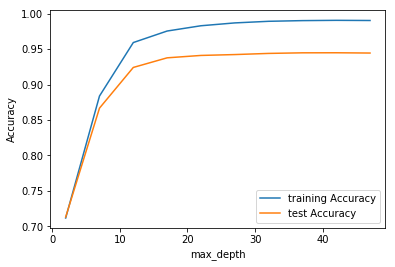

In [523]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_Accuracy"], 
         label="training Accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_Accuracy"], 
         label="test Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


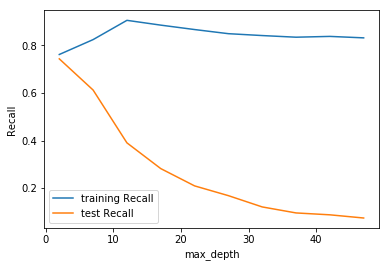

In [524]:
# plotting Recall with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_Recall"], 
         label="training Recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_Recall"], 
         label="test Recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()


*From above, 12 is the optimum depth to get good accuracy but 3 is to get good Recall*

*Tune number of estimators*

In [529]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 300)}
scoring = {'Accuracy': 'accuracy', 'Recall': 'recall'}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,class_weight = {0:0.05, 1: 0.95})


# fit tree on training data
r2 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scoring,
                  refit=False,
                 n_jobs=-1)
r2.fit(tel_p1, Y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(100, 1500, 300)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'Recall': 'recall'}, verbose=0)

In [530]:
# scores of GridSearch CV
scores = r2.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,...,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_train_Recall,split1_train_Recall,split2_train_Recall,split3_train_Recall,split4_train_Recall,mean_train_Recall,std_train_Recall
0,6.236706,0.743910,0.297604,0.106457,100,{'n_estimators': 100},0.806147,0.825867,0.817044,0.811992,...,0.712751,0.043752,3,0.802567,0.781836,0.783037,0.792899,0.770217,0.786111,0.010929
1,32.296222,1.175514,0.662428,0.073048,400,{'n_estimators': 400},0.816246,0.825648,0.826268,0.810455,...,0.717499,0.047560,1,0.799605,0.776900,0.784024,0.786982,0.790927,0.787688,0.007521
2,60.830315,2.084032,1.207547,0.206275,700,{'n_estimators': 700},0.818441,0.830479,0.826927,0.808478,...,0.717485,0.037407,2,0.802567,0.785785,0.785010,0.794872,0.783037,0.790254,0.007382
3,86.445366,3.401225,1.377133,0.156372,1000,{'n_estimators': 1000},0.814709,0.831357,0.828684,0.813969,...,0.711955,0.036037,5,0.803554,0.788746,0.783037,0.794872,0.783037,0.790649,0.007796
4,88.072411,8.607865,1.316480,0.297859,1300,{'n_estimators': 1300},0.816685,0.824111,0.826708,0.813090,...,0.711963,0.042183,4,0.800592,0.786772,0.788955,0.791913,0.787968,0.791240,0.004976


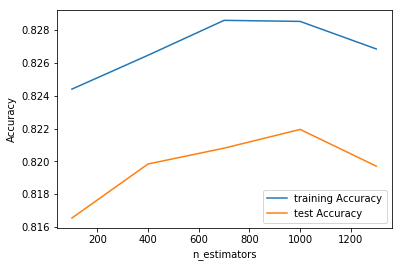

In [531]:
# plotting accuracies with number of estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_Accuracy"], 
         label="training Accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_Accuracy"], 
         label="test Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


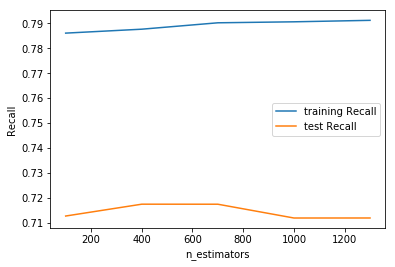

In [532]:
# plotting recall with number of estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_Recall"], 
         label="training Recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_Recall"], 
         label="test Recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()


*From above, 1000 is the optimum no of estimators to get good accuracy but 600 is to get good Recall*

*Tune Max features*

In [533]:
# GridSearchCV to find optimal Max features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,50]}
scoring = {'Accuracy': 'accuracy', 'Recall': 'recall'}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,class_weight = {0:0.05, 1: 0.95})


# fit tree on training data
r3 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scoring,
                  refit=False,
                 n_jobs=-1)
r3.fit(tel_p1, Y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 8, 14, 20, 24, 50]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'Recall': 'recall'}, verbose=0)

In [534]:
# scores of GridSearch CV
scores = r3.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,...,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_train_Recall,split1_train_Recall,split2_train_Recall,split3_train_Recall,split4_train_Recall,mean_train_Recall,std_train_Recall
0,0.254319,0.024397,0.035307,0.018469,4,{'max_features': 4},0.768606,0.795564,0.768944,0.733363,...,0.714335,0.052135,1,0.791708,0.771964,0.796844,0.789941,0.759369,0.781965,0.014075
1,0.622354,0.102430,0.059042,0.065249,8,{'max_features': 8},0.796926,0.816425,0.796618,0.754228,...,0.704875,0.040784,4,0.767029,0.741362,0.785996,0.789941,0.755424,0.767950,0.018297
2,1.421598,0.092457,0.019148,0.003051,14,{'max_features': 14},0.782876,0.810496,0.816824,0.798155,...,0.711957,0.033781,2,0.776900,0.764067,0.747535,0.768245,0.772189,0.765787,0.010066
3,2.007428,0.068359,0.019947,0.001669,20,{'max_features': 20},0.793194,0.805007,0.792884,0.763453,...,0.709594,0.039413,3,0.779862,0.781836,0.763314,0.787968,0.757396,0.774075,0.011668
4,2.384622,0.091683,0.019747,0.005178,24,{'max_features': 24},0.799780,0.818621,0.808039,0.786514,...,0.696175,0.045822,6,0.763080,0.752221,0.732742,0.772189,0.752465,0.754540,0.013185


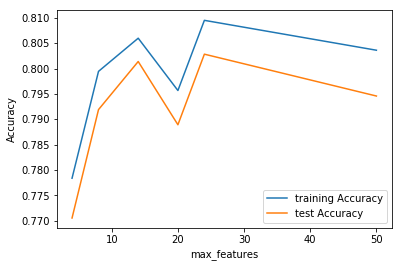

In [535]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_Accuracy"], 
         label="training Accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_Accuracy"], 
         label="test Accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


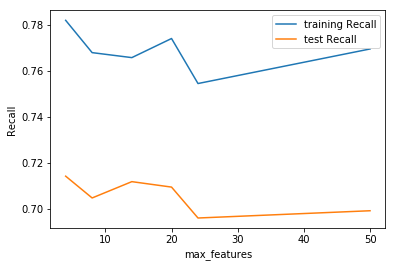

In [536]:
# plotting recall with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_Recall"], 
         label="training Recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_Recall"], 
         label="test Recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


*From above, 25 is the optimum no of features to get good accuracy but 3 is to get good Recall*

*Tune min_samples_leaf*

In [537]:
# GridSearchCV to find optimal min samples per leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(10,1000, 50)}
scoring = {'Accuracy': 'accuracy', 'Recall': 'recall'}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,class_weight = {0:0.05, 1: 0.95})


# fit tree on training data
r4 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scoring,
                  refit=False,
                 n_jobs=-1)
r4.fit(tel_p1, Y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(10, 1000, 50)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'Recall': 'recall'}, verbose=0)

In [538]:
# scores of GridSearch CV
scores = r4.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,...,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_train_Recall,split1_train_Recall,split2_train_Recall,split3_train_Recall,split4_train_Recall,mean_train_Recall,std_train_Recall
0,0.424065,0.043019,0.028529,0.020509,10,{'min_samples_leaf': 10},0.795609,0.780852,0.772677,0.754887,...,0.708775,0.035331,19,0.781836,0.794669,0.760355,0.795858,0.761341,0.778812,0.015473
1,0.557895,0.131380,0.035106,0.030076,60,{'min_samples_leaf': 60},0.769484,0.810496,0.795519,0.779047,...,0.710374,0.042846,18,0.788746,0.764067,0.781065,0.794872,0.725838,0.770918,0.024794
2,0.699131,0.034219,0.018949,0.003278,110,{'min_samples_leaf': 110},0.754116,0.791173,0.768724,0.776631,...,0.716705,0.039965,17,0.800592,0.762093,0.795858,0.803748,0.776134,0.787685,0.015999
3,0.739823,0.145705,0.018149,0.000395,160,{'min_samples_leaf': 160},0.784632,0.768336,0.729190,0.738414,...,0.733243,0.021908,8,0.787759,0.782823,0.791913,0.788955,0.756410,0.781572,0.012918
4,0.813624,0.077701,0.018351,0.001353,210,{'min_samples_leaf': 210},0.801098,0.801932,0.777729,0.769163,...,0.717499,0.034477,15,0.768016,0.769990,0.790927,0.776134,0.803748,0.781763,0.013613


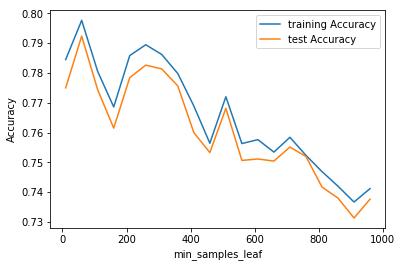

In [539]:
# plotting accuracies with min samples per leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_Accuracy"], 
         label="training Accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_Accuracy"], 
         label="test Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


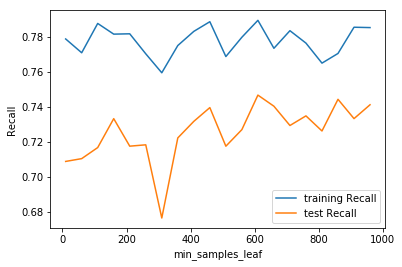

In [540]:
# plotting recall with min samples per leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_Recall"], 
         label="training Recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_Recall"], 
         label="test Recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()


*From above we observed that model is swinging and not stable with the change in no of samples per leaf*

*Tune min samples per split*

In [541]:
# GridSearchCV to find optimal min samples per split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(10,1000, 50)}
scoring = {'Accuracy': 'accuracy', 'Recall': 'recall'}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=3,class_weight = {0:0.05, 1: 0.95})


# fit tree on training data
r5 = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=scoring,
                  refit=False,
                 n_jobs=-1)
r5.fit(tel_p1, Y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': range(10, 1000, 50)},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring={'Accuracy': 'accuracy', 'Recall': 'recall'}, verbose=0)

In [542]:
# scores of GridSearch CV
scores = r5.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,...,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_train_Recall,split1_train_Recall,split2_train_Recall,split3_train_Recall,split4_train_Recall,mean_train_Recall,std_train_Recall
0,0.306366,0.010236,0.012167,0.000735,10,{'min_samples_split': 10},0.720307,0.774045,0.784318,0.728970,...,0.702465,0.035894,18,0.805528,0.741362,0.725838,0.790927,0.742604,0.761252,0.031108
1,0.469535,0.147526,0.057247,0.053245,60,{'min_samples_split': 60},0.772777,0.741985,0.744784,0.724358,...,0.731702,0.048548,6,0.755183,0.777887,0.766272,0.773176,0.792899,0.773083,0.012511
2,0.579849,0.018331,0.016357,0.000798,110,{'min_samples_split': 110},0.771240,0.775362,0.772458,0.722381,...,0.714375,0.053475,14,0.742349,0.732478,0.755424,0.775148,0.773176,0.755715,0.016740
3,0.532175,0.015095,0.016955,0.001092,160,{'min_samples_split': 160},0.741822,0.778217,0.784098,0.769163,...,0.721391,0.020799,13,0.798618,0.767029,0.760355,0.756410,0.742604,0.765003,0.018608
4,0.569676,0.045892,0.016357,0.000488,210,{'min_samples_split': 210},0.744676,0.759332,0.724577,0.738195,...,0.723782,0.039712,11,0.775913,0.773939,0.773176,0.768245,0.725838,0.763422,0.018961


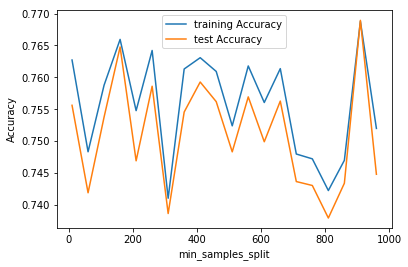

In [543]:
# plotting accuracies with min no of samples per split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_Accuracy"], 
         label="training Accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_Accuracy"], 
         label="test Accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

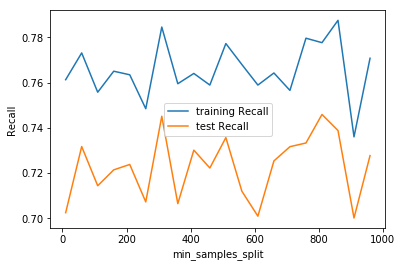

In [544]:
# plotting recall with min no of samples per split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_Recall"], 
         label="training Recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_Recall"], 
         label="test Recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()


*From above we observed that model is swinging and not stable with the change in no of samples per split*

*Grid Search to Find Optimal Hyperparameters*

In [583]:
## Lets find the optimal hyperparameter combination which gives good accuracy

In [545]:
# Create the parameter grid based on the results of random search  done in the above cells
param_grid = {
    'max_depth': [3,6,9,12],
    'min_samples_leaf': range(100, 1000, 200),
    'min_samples_split': range(100, 1000, 200),
    'n_estimators': [400,500,700,1000], 
    'max_features': [3,5,7,10,20,25]
}
# Create a based model
r_fin = RandomForestClassifier(class_weight = {0:0.05, 1: 0.95})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = r_fin, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [546]:
# Fit the grid search to the data
grid_search.fit(tel_p1, Y_train1)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 78.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 181.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 229.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 332.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 456.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 573.7min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 713.4min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 941.4min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 945.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 6, 9, 12], 'min_samples_leaf': range(100, 1000, 200), 'min_samples_split': range(100, 1000, 200), 'n_estimators': [400, 500, 700, 1000], 'max_features': [3, 5, 7, 10, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [550]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8754392129304287 using {'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 400}


In [584]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
fin_1 = RandomForestClassifier(bootstrap=True,
                            class_weight = {0:0.05, 1: 0.95},
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=3,
                             n_estimators=400)

In [585]:
# fit train data
fin_1.fit(tel_p1,Y_train1)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=12, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

*Train data evaluation*

In [586]:
# predict on train set
predic1 = fin_1.predict(tel_p1)

In [587]:
#Confusion matrix

conf1 = (confusion_matrix(Y_train1,predic1))
conf1

array([[19135,  2366],
       [  201,  1066]], dtype=int64)

In [601]:
TP1 = conf1[1,1] # true positive 
TN1 = conf1[0,0] # true negatives
FP1 = conf1[0,1] # false positives
FN1 = conf1[1,0] # false negatives

In [604]:
##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_train1,predic1))
print('Accuracy is:',metrics.accuracy_score(Y_train1,predic1))
print('Recall is:',(TP1 / float(TP1+FN1)))
print('Precision or positive pred value is:',((TP1 / float(TP1+FP1))))
print('false positive rate is:',(FP1/ float(TN1+FP1)))

AUC is: 0.8656580720332862
Accuracy is: 0.88725404075896
Recall is: 0.8413575374901342
Precision or positive pred value is: 0.3106060606060606
false positive rate is: 0.1100413934235617


*Test data evaluation*

In [596]:
# predict on test data
predic2 = fin_1.predict(tel_p2)

In [597]:
#Confusion matrix

conf2 = (confusion_matrix(Y_test1,predic2))
conf2

array([[4715,  656],
       [ 102,  219]], dtype=int64)

In [602]:
TP2 = conf2[1,1] # true positive 
TN2 = conf2[0,0] # true negatives
FP2 = conf2[0,1] # false positives
FN2 = conf2[1,0] # false negatives

In [605]:
##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_test1,predic2))
print('Accuracy is:',metrics.accuracy_score(Y_test1,predic2))
print('Recall is:',(TP2 / float(TP2+FN2)))
print('Precision or positive pred value is:',((TP2 / float(TP2+FP2))))
print('false positive rate is:',(FP2/ float(TN2+FP2)))

AUC is: 0.7800527930370265
Accuracy is: 0.8668306394940267
Recall is: 0.6822429906542056
Precision or positive pred value is: 0.2502857142857143
false positive rate is: 0.12213740458015267


*From above metrics we can say that **Accuracy** is pretty good and there is no much deviation between Train and Test*<br>
*But **Recall** dropped in Test set*<br>
*So Let's build a model with different set of hyperparametrs to get good 'RECALL' as it is main business objective*

In [617]:
##Below is the model to get good Recall
## Hyperparameter values are taken from the models which bulit as part individual hyperparameter tuning
## Hyper parameters are taken such that RECALL is maximum

In [606]:
# model with the optimal hyperparameters to get good recall
from sklearn.ensemble import RandomForestClassifier
fin_2 = RandomForestClassifier(bootstrap=True,
                            class_weight = {0:0.05, 1: 0.95},
                             max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=3,
                             n_estimators=600)

In [607]:
# fit train data
fin_2.fit(tel_p1,Y_train1)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=3, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

*Train set evaluation*

In [608]:
# predict on train set
predic3 = fin_2.predict(tel_p1)

In [609]:
#Confusion matrix

conf3 = (confusion_matrix(Y_train1,predic3))
conf3

array([[16288,  5213],
       [  233,  1034]], dtype=int64)

In [610]:
TP1 = conf3[1,1] # true positive 
TN1 = conf3[0,0] # true negatives
FP1 = conf3[0,1] # false positives
FN1 = conf3[1,0] # false negatives

In [611]:
##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_train1,predic3))
print('Accuracy is:',metrics.accuracy_score(Y_train1,predic3))
print('Recall is:',(TP1 / float(TP1+FN1)))
print('Precision or positive pred value is:',((TP1 / float(TP1+FP1))))
print('false positive rate is:',(FP1/ float(TN1+FP1)))

AUC is: 0.7868235933447341
Accuracy is: 0.7608046380885454
Recall is: 0.8161010260457774
Precision or positive pred value is: 0.16551944933568113
false positive rate is: 0.24245383935630901


*Test set evaluation*

In [612]:
# predict on train set
predic4 = fin_2.predict(tel_p2)

In [614]:
#Confusion matrix

conf4 = (confusion_matrix(Y_test1,predic4))
conf4

array([[4037, 1334],
       [  61,  260]], dtype=int64)

In [615]:
TP2 = conf4[1,1] # true positive 
TN2 = conf4[0,0] # true negatives
FP2 = conf4[0,1] # false positives
FN2 = conf4[1,0] # false negatives

In [616]:
##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_test1,predic4))
print('Accuracy is:',metrics.accuracy_score(Y_test1,predic4))
print('Recall is:',(TP2 / float(TP2+FN2)))
print('Precision or positive pred value is:',((TP2 / float(TP2+FP2))))
print('false positive rate is:',(FP2/ float(TN2+FP2)))

AUC is: 0.7807989833483268
Accuracy is: 0.7549191848208011
Recall is: 0.8099688473520249
Precision or positive pred value is: 0.16311166875784192
false positive rate is: 0.24837088065537144


*Below are the observations after looking at the above metrics*<br>
*Finally we have achieved good amount of RECALL which is our business objective*<br>
*And also there is less difference in metrcis between base and testline*<br>
*But there is decrease in Precision and also little dip in accuracy too*<br>
*Lets jump into support vector machine model*

***SVM Model***

In [618]:
## Let's build SVM model and check how it peforms on our data

In [60]:
## Import SVC
from sklearn.svm import SVC

*Let's start with linear model*

In [61]:
# creating a KFold object with 5 splits 
folds = KFold( n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params1 = [{'C': [0.01,1, 10, 100]}]


# specify model
model1 = SVC(kernel="linear",class_weight = {0:0.05, 1: 0.95})
scoring1 = {'Accuracy': 'accuracy', 'Recall': 'recall'}

# set up GridSearchCV()
model_cv1 = GridSearchCV(estimator = model1, 
                        param_grid = hyper_params1,   
                        scoring=scoring1, 
                        cv = folds, 
                        verbose = 1,
                         n_jobs=-1,
                         refit=False,
                        return_train_score=True)      

# fit the model
model_cv1.fit(tel_p1, Y_train1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 18.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight={0: 0.05, 1: 0.95}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 1, 10, 100]}], pre_dispatch='2*n_jobs',
       refit=False, return_train_score=True,
       scoring={'Accuracy': 'accuracy', 'Recall': 'recall'}, verbose=1)

In [64]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1
cv_results1[['param_C','mean_train_Accuracy','mean_test_Accuracy','mean_train_Recall','mean_test_Recall']]

,param_C,mean_train_Accuracy,mean_test_Accuracy,mean_train_Recall,mean_test_Recall
0,0.01,0.776100,0.776397,0.822414,0.807362
1,1,0.782568,0.782238,0.823582,0.802806
2,10,0.782414,0.782238,0.822988,0.803622
3,100,0.782480,0.782106,0.823185,0.802850


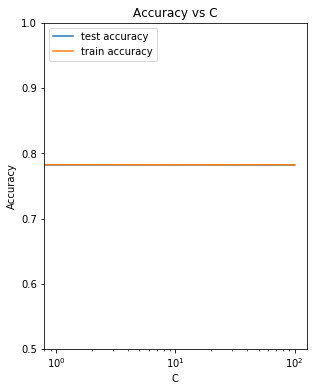

In [65]:
# Let's plot C vs Accuracy
# converting C to numeric type for plotting on x-axis
cv_results1['param_C'] = cv_results1['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results1

plt.plot(gamma_01["param_C"], gamma_01["mean_test_Accuracy"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_Accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Accuracy vs C")
plt.ylim([0.5, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

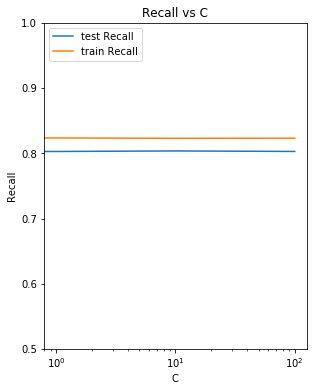

In [66]:
#Let's plot C vs Recall
# converting C to numeric type for plotting on x-axis
cv_results1['param_C'] = cv_results1['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results1

plt.plot(gamma_01["param_C"], gamma_01["mean_test_Recall"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_Recall"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Recall vs C")
plt.ylim([0.5, 1])
plt.legend(['test Recall', 'train Recall'], loc='upper left')
plt.xscale('log')

*From above plots we can say that linear model seems to be giving good accuracy and good recall*<br>
*Let's build a linear SVM model with C=1 and evaluate the metrics*

In [67]:
# model building with C=1
model1 = SVC(C=1,kernel="linear",class_weight={0: 0.05, 1: 0.95})
model1.fit(tel_p1, Y_train1)

SVC(C=1, cache_size=200, class_weight={0: 0.05, 1: 0.95}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

*Train set evaluation*

In [76]:
Y_predl1 = model1.predict(tel_p1)  # Predict on train data

#Confusion matrix
confm1 = (confusion_matrix(Y_train1,Y_predl1))
print(confm1)

TP = confm1[1,1] # true positive 
TN = confm1[0,0] # true negatives
FP = confm1[0,1] # false positives
FN = confm1[1,0] # false negatives



##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_train1,Y_predl1))
print('Accuracy is:',metrics.accuracy_score(Y_train1,Y_predl1))
print('Recall is:',(TP / float(TP+FN)))
print('Precision or positive pred value is:',((TP / float(TP+FP))))
print('false positive rate is:',(FP/ float(TN+FP)))

[[16785  4716]
 [  226  1041]]
AUC is: 0.8011436262559621
Accuracy is: 0.7829409697821503
Recall is: 0.8216258879242304
Precision or positive pred value is: 0.18082334549244397
false positive rate is: 0.21933863541230642


*Test data evaluation*

In [79]:
Y_predl2 = model1.predict(tel_p2)  # Predict on test data

#Confusion matrix
confm2 = (confusion_matrix(Y_test1,Y_predl2))
print(confm2)

TP = confm2[1,1] # true positive 
TN = confm2[0,0] # true negatives
FP = confm2[0,1] # false positives
FN = confm2[1,0] # false negatives



##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_test1,Y_predl2))
print('Accuracy is:',metrics.accuracy_score(Y_test1,Y_predl2))
print('Recall is:',(TP / float(TP+FN)))
print('Precision or positive pred value is:',((TP / float(TP+FP))))
print('false positive rate is:',(FP/ float(TN+FP)))

[[4153 1218]
 [  53  268]]
AUC is: 0.8040587764798959
Accuracy is: 0.7767041461700632
Recall is: 0.8348909657320872
Precision or positive pred value is: 0.180349932705249
false positive rate is: 0.22677341277229565


*After looking at the above metrics evaluated on Train and Test sets,Below are the observations*<br>
*Recall is good and Accuracy is also not bad and not much deviation in metrics between Train and Test sets*

*Poly SVM model*

In [62]:
##Poly SVM model
# creating a KFold object with 5 splits 
folds3 = KFold( n_splits = 5, shuffle = True, random_state = 42)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params3 = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100]}]


# specify model
model3 = SVC(kernel="poly",class_weight = {0:0.05, 1: 0.95})
scoring3 = {'Accuracy': 'accuracy', 'Recall': 'recall'}

# set up GridSearchCV()
model_cv3 = GridSearchCV(estimator = model3, 
                        param_grid = hyper_params3, 
                        scoring= scoring3, 
                         refit=False,
                        cv = folds3, 
                        verbose = 1,
                        return_train_score=True,
                         n_jobs=-1)      

# fit the model
model_cv3.fit(tel_p1, Y_train1)           

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 23.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight={0: 0.05, 1: 0.95}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring={'Accuracy': 'accuracy', 'Recall': 'recall'}, verbose=1)

In [81]:
# cv results
cv_results3 = pd.DataFrame(model_cv3.cv_results_)
cv_results3[['param_C','mean_train_Accuracy','mean_test_Accuracy','mean_train_Recall','mean_test_Recall']]

,param_C,mean_train_Accuracy,mean_test_Accuracy,mean_train_Recall,mean_test_Recall
0,1,0.860001,0.849086,0.792604,0.683648
1,1,0.066178,0.065091,1.000000,0.996065
2,1,0.055692,0.055648,1.000000,1.000000
3,10,0.891317,0.865118,0.871199,0.651998
4,10,0.101184,0.098647,0.997633,0.984255
5,10,0.056164,0.055824,1.000000,0.999256
6,100,0.926004,0.875132,0.962323,0.578023
7,100,0.302398,0.294273,0.983405,0.938980
8,100,0.058185,0.057625,1.000000,0.998453


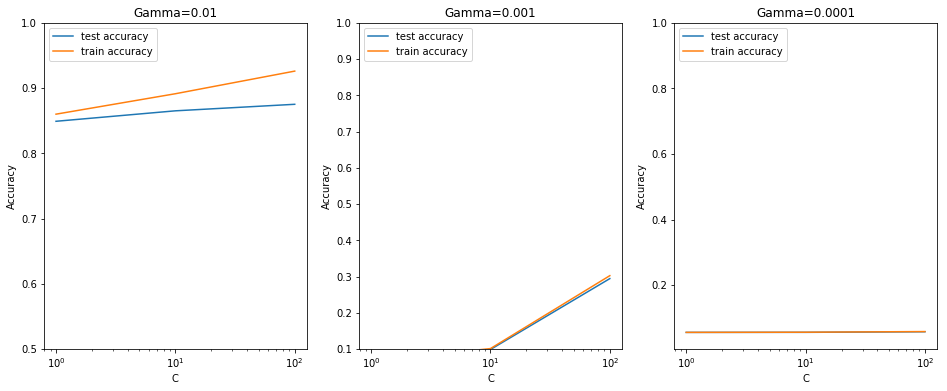

In [82]:
# converting C to numeric type for plotting on x-axis
cv_results3['param_C'] = cv_results3['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results3[cv_results3['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_Accuracy"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_Accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.5, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results3[cv_results3['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_Accuracy"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_Accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.1, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results3[cv_results3['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_Accuracy"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_Accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.005, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

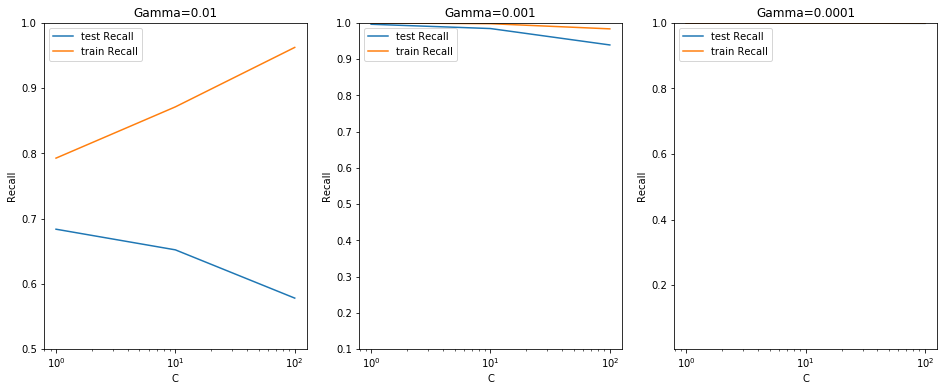

In [83]:
# converting C to numeric type for plotting on x-axis
cv_results3['param_C'] = cv_results3['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results3[cv_results3['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_Recall"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_Recall"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.01")
plt.ylim([0.5, 1])
plt.legend(['test Recall', 'train Recall'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results3[cv_results3['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_Recall"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_Recall"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.001")
plt.ylim([0.1, 1])
plt.legend(['test Recall', 'train Recall'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results3[cv_results3['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_Recall"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_Recall"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.0001")
plt.ylim([0.005, 1])
plt.legend(['test Recall', 'train Recall'], loc='upper left')
plt.xscale('log')

*From above plots we can say that Poly model seems to be giving good accuracy and good recall than linear*<br>
*Let's build a linear SVM model with C=1 and gamma=0.01 and evaluate the metrics*

In [85]:
# model building with C=1
model2 = SVC(C=1,kernel="poly",gamma=0.01,class_weight={0: 0.05, 1: 0.95})
model2.fit(tel_p1, Y_train1)

SVC(C=1, cache_size=200, class_weight={0: 0.05, 1: 0.95}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

*Train data evaluation*

In [86]:
Y_predl1 = model2.predict(tel_p1)  # Predict on train data

#Confusion matrix
confm1 = (confusion_matrix(Y_train1,Y_predl1))
print(confm1)

TP = confm1[1,1] # true positive 
TN = confm1[0,0] # true negatives
FP = confm1[0,1] # false positives
FN = confm1[1,0] # false negatives



##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_train1,Y_predl1))
print('Accuracy is:',metrics.accuracy_score(Y_train1,Y_predl1))
print('Recall is:',(TP / float(TP+FN)))
print('Precision or positive pred value is:',((TP / float(TP+FP))))
print('false positive rate is:',(FP/ float(TN+FP)))

[[18671  2830]
 [  268   999]]
AUC is: 0.828427465810129
Accuracy is: 0.8639318341531975
Recall is: 0.7884767166535123
Precision or positive pred value is: 0.2609036301906503
false positive rate is: 0.13162178503325428


*Test data evaluation*

In [87]:
Y_predl2 = model2.predict(tel_p2)  # Predict on test data

#Confusion matrix
confm2 = (confusion_matrix(Y_test1,Y_predl2))
print(confm2)

TP = confm2[1,1] # true positive 
TN = confm2[0,0] # true negatives
FP = confm2[0,1] # false positives
FN = confm2[1,0] # false negatives



##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_test1,Y_predl2))
print('Accuracy is:',metrics.accuracy_score(Y_test1,Y_predl2))
print('Recall is:',(TP / float(TP+FN)))
print('Precision or positive pred value is:',((TP / float(TP+FP))))
print('false positive rate is:',(FP/ float(TN+FP)))

[[4633  738]
 [  95  226]]
AUC is: 0.7833226320420441
Accuracy is: 0.8536542515811666
Recall is: 0.7040498442367601
Precision or positive pred value is: 0.23443983402489627
false positive rate is: 0.13740458015267176


*After looking at the above metrics evaluated on Train and Test sets,Below are the observations*<br>
*Recall is little low but Accuracy is great and not much deviation in metrics between Train and Test sets*

*RBF model*

In [63]:
# creating a KFold object with 5 splits 
folds2 = KFold( n_splits = 5, shuffle = True, random_state = 42)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params2 = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100,1000]}]


# specify model
model2 = SVC(kernel="rbf",class_weight = {0:0.05, 1: 0.95})
scoring2 = {'Accuracy': 'accuracy', 'Recall': 'recall'}

# set up GridSearchCV()
model_cv2 = GridSearchCV(estimator = model2, 
                        param_grid = hyper_params2, 
                        scoring= scoring2, 
                         refit=False,
                        cv = folds2, 
                        verbose = 1,
                        return_train_score=True,
                         n_jobs=-1)      

# fit the model
model_cv2.fit(tel_p1, Y_train1)               

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 20.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight={0: 0.05, 1: 0.95}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring={'Accuracy': 'accuracy', 'Recall': 'recall'}, verbose=1)

In [88]:
# cv results
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2
cv_results2[['param_C','mean_train_Accuracy','mean_test_Accuracy','mean_train_Recall','mean_test_Recall']]

,param_C,mean_train_Accuracy,mean_test_Accuracy,mean_train_Recall,mean_test_Recall
0,1,0.820702,0.811841,0.862870,0.756900
1,1,0.762869,0.762298,0.824579,0.809793
2,1,0.634784,0.634048,0.848791,0.841763
3,10,0.873660,0.849701,0.930738,0.680469
4,10,0.799928,0.796425,0.837028,0.798137
5,10,0.759827,0.759092,0.821836,0.809676
6,100,0.927760,0.884794,0.984802,0.562276
7,100,0.827082,0.815531,0.875277,0.769242
8,100,0.783358,0.781887,0.826769,0.802029
9,1000,0.974712,0.909654,0.999408,0.411658


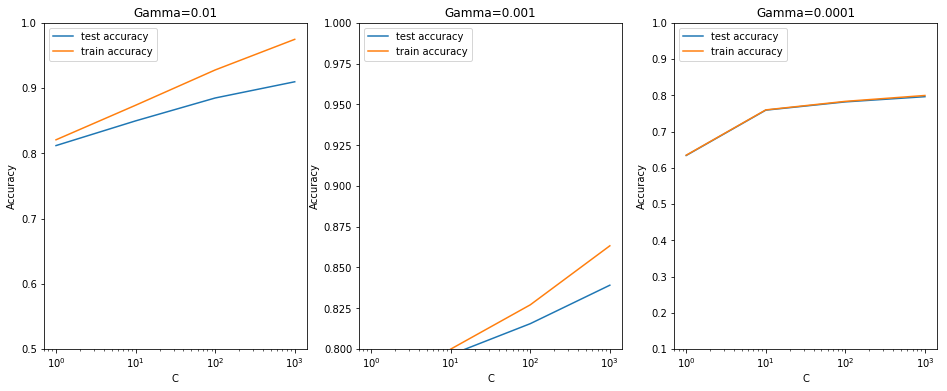

In [89]:
# converting C to numeric type for plotting on x-axis
cv_results2['param_C'] = cv_results2['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results2[cv_results2['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_Accuracy"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_Accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.5, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results2[cv_results2['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_Accuracy"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_Accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results2[cv_results2['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_Accuracy"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_Accuracy"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.1, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

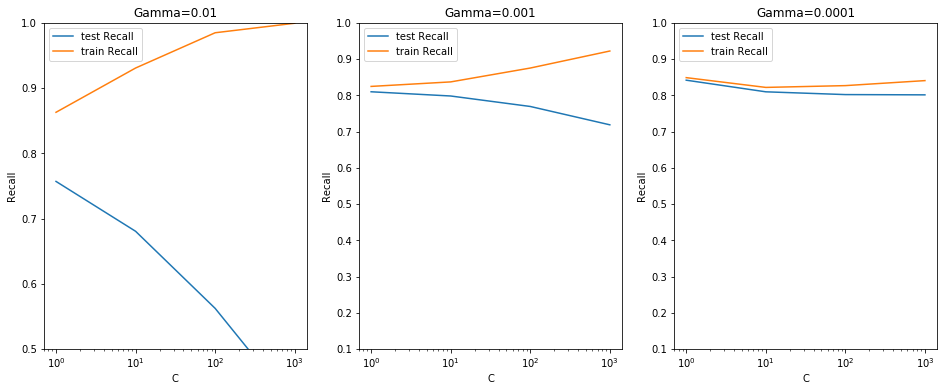

In [90]:
# converting C to numeric type for plotting on x-axis
cv_results2['param_C'] = cv_results2['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results2[cv_results2['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_Recall"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_Recall"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.01")
plt.ylim([0.5, 1])
plt.legend(['test Recall', 'train Recall'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results2[cv_results2['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_Recall"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_Recall"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.001")
plt.ylim([0.1, 1])
plt.legend(['test Recall', 'train Recall'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results2[cv_results2['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_Recall"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_Recall"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.0001")
plt.ylim([0.1, 1])
plt.legend(['test Recall', 'train Recall'], loc='upper left')
plt.xscale('log')

*After having a look at above plots we can say that at C=1000 and gamma=0.0001 model seems to have good compomise*<br>
*between accuracy and recall*<br>

In [91]:
# model building with C=1000,gamma=0.0001
model3 = SVC(C=1000,kernel="rbf",gamma=0.0001,class_weight={0: 0.05, 1: 0.95})
model3.fit(tel_p1, Y_train1)

SVC(C=1000, cache_size=200, class_weight={0: 0.05, 1: 0.95}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

*Train data evaluation*

In [92]:
Y_predl1 = model3.predict(tel_p1)  # Predict on train data

#Confusion matrix
confm1 = (confusion_matrix(Y_train1,Y_predl1))
print(confm1)

TP = confm1[1,1] # true positive 
TN = confm1[0,0] # true negatives
FP = confm1[0,1] # false positives
FN = confm1[1,0] # false negatives



##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_train1,Y_predl1))
print('Accuracy is:',metrics.accuracy_score(Y_train1,Y_predl1))
print('Recall is:',(TP / float(TP+FN)))
print('Precision or positive pred value is:',((TP / float(TP+FP))))
print('false positive rate is:',(FP/ float(TN+FP)))

[[17167  4334]
 [  205  1062]]
AUC is: 0.8183142268267694
Accuracy is: 0.8006412508784259
Recall is: 0.8382004735595896
Precision or positive pred value is: 0.19681245366938474
false positive rate is: 0.2015720199060509


*Test data evaluation*

In [93]:
Y_predl2 = model3.predict(tel_p2)  # Predict on test data

#Confusion matrix
confm2 = (confusion_matrix(Y_test1,Y_predl2))
print(confm2)

TP = confm2[1,1] # true positive 
TN = confm2[0,0] # true negatives
FP = confm2[0,1] # false positives
FN = confm2[1,0] # false negatives



##Print the metrics

print('AUC is:',metrics.roc_auc_score(Y_test1,Y_predl2))
print('Accuracy is:',metrics.accuracy_score(Y_test1,Y_predl2))
print('Recall is:',(TP / float(TP+FN)))
print('Precision or positive pred value is:',((TP / float(TP+FP))))
print('false positive rate is:',(FP/ float(TN+FP)))

[[4268 1103]
 [  54  267]]
AUC is: 0.813206785488701
Accuracy is: 0.7967322557976106
Recall is: 0.8317757009345794
Precision or positive pred value is: 0.1948905109489051
false positive rate is: 0.20536212995717743


**Conclusion from different SVM models built**<br>
*'RBF' kernel model is giving good results at c=1000 and gamma=0.0001*

**Conclusion from all the different classification models built till now**<br>
*Logistic and SVM models are giving slight good accuracy and recall compared to Random forest*<br>
*Our business objective of having good 'Recall' is achieved by all the models*<br>
*As all the models are giving almost same values of metrics, It would be better to go with Logistic regression as it will*<br>
*take less resources and time*<br>
*Also as dataset contains all the numerical columns it's not better option to select Random forest or decision tree*

**Important drivers fo the Churn**

*We are done building the model to predict the churn*<br>
*Now let's build a model to know the important drivers of churn*<br>
*Let's build decision tree and Logistic models for this*<br>
*We use original features instead of principle components*

**Decision Tree**

In [132]:
## As we are not worried about prediction now, Let's just build tree with default values

In [133]:
# Fitting the decision tree with default hyperparameters, apart from
# We are considering original features for this(Not principle components)

from sklearn.tree import DecisionTreeClassifier
dr_default = DecisionTreeClassifier(max_depth=5,class_weight = {0:0.05, 1: 0.95})
dr_default.fit(X_train1, Y_train1)

DecisionTreeClassifier(class_weight={0: 0.05, 1: 0.95}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

*Now let's calculate importance each feature in the tree*<br>
*We use GINI value to calculate the importance*

In [134]:
feat_imp = pd.Series(dr_default.feature_importances_)
feat_imp

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.003641
8      0.000000
9      0.000000
10     0.000000
11     0.025902
12     0.000000
13     0.008386
14     0.151757
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
127    0.000000
128    0.000000
129    0.000000
130    0.000000
131    0.000000
132    0.000000
133    0.000000
134    0.000000
135    0.000000
136    0.000000
137    0.000000
138    0.000000
139    0.000000
140    0.000000
141    0.000000
142    0.000000
143    0.000000
144    0.008425
145    0.000000
146    0.000000
147    0.000000
148    0.011507
149    0.000000
150    0.000000
151    0.000000
152    0.000000
153    0.007220
154    0.000000
155    0.000000
156    0.116111
Length: 157, dtype: floa

In [135]:
##Let's combine these importances with column names

a1 = pd.Series(X_train1.columns)
feat = pd.concat([a1, feat_imp], axis=1)
feat.sort_values(1, axis=0, ascending=False)

,0,1
65,loc_ic_mou_8,0.426350
14,roam_og_mou_8,0.151757
156,per_change_rech_good_to_act,0.116111
116,av_rech_amt_data_8,0.062121
40,std_og_mou_7,0.038105
11,roam_ic_mou_8,0.025902
80,total_ic_mou_8,0.025580
101,last_day_rch_amt_8,0.025535
46,spl_og_mou_7,0.019025
53,total_og_mou_8,0.017373


In [141]:
## Let's visualize the feature impotances

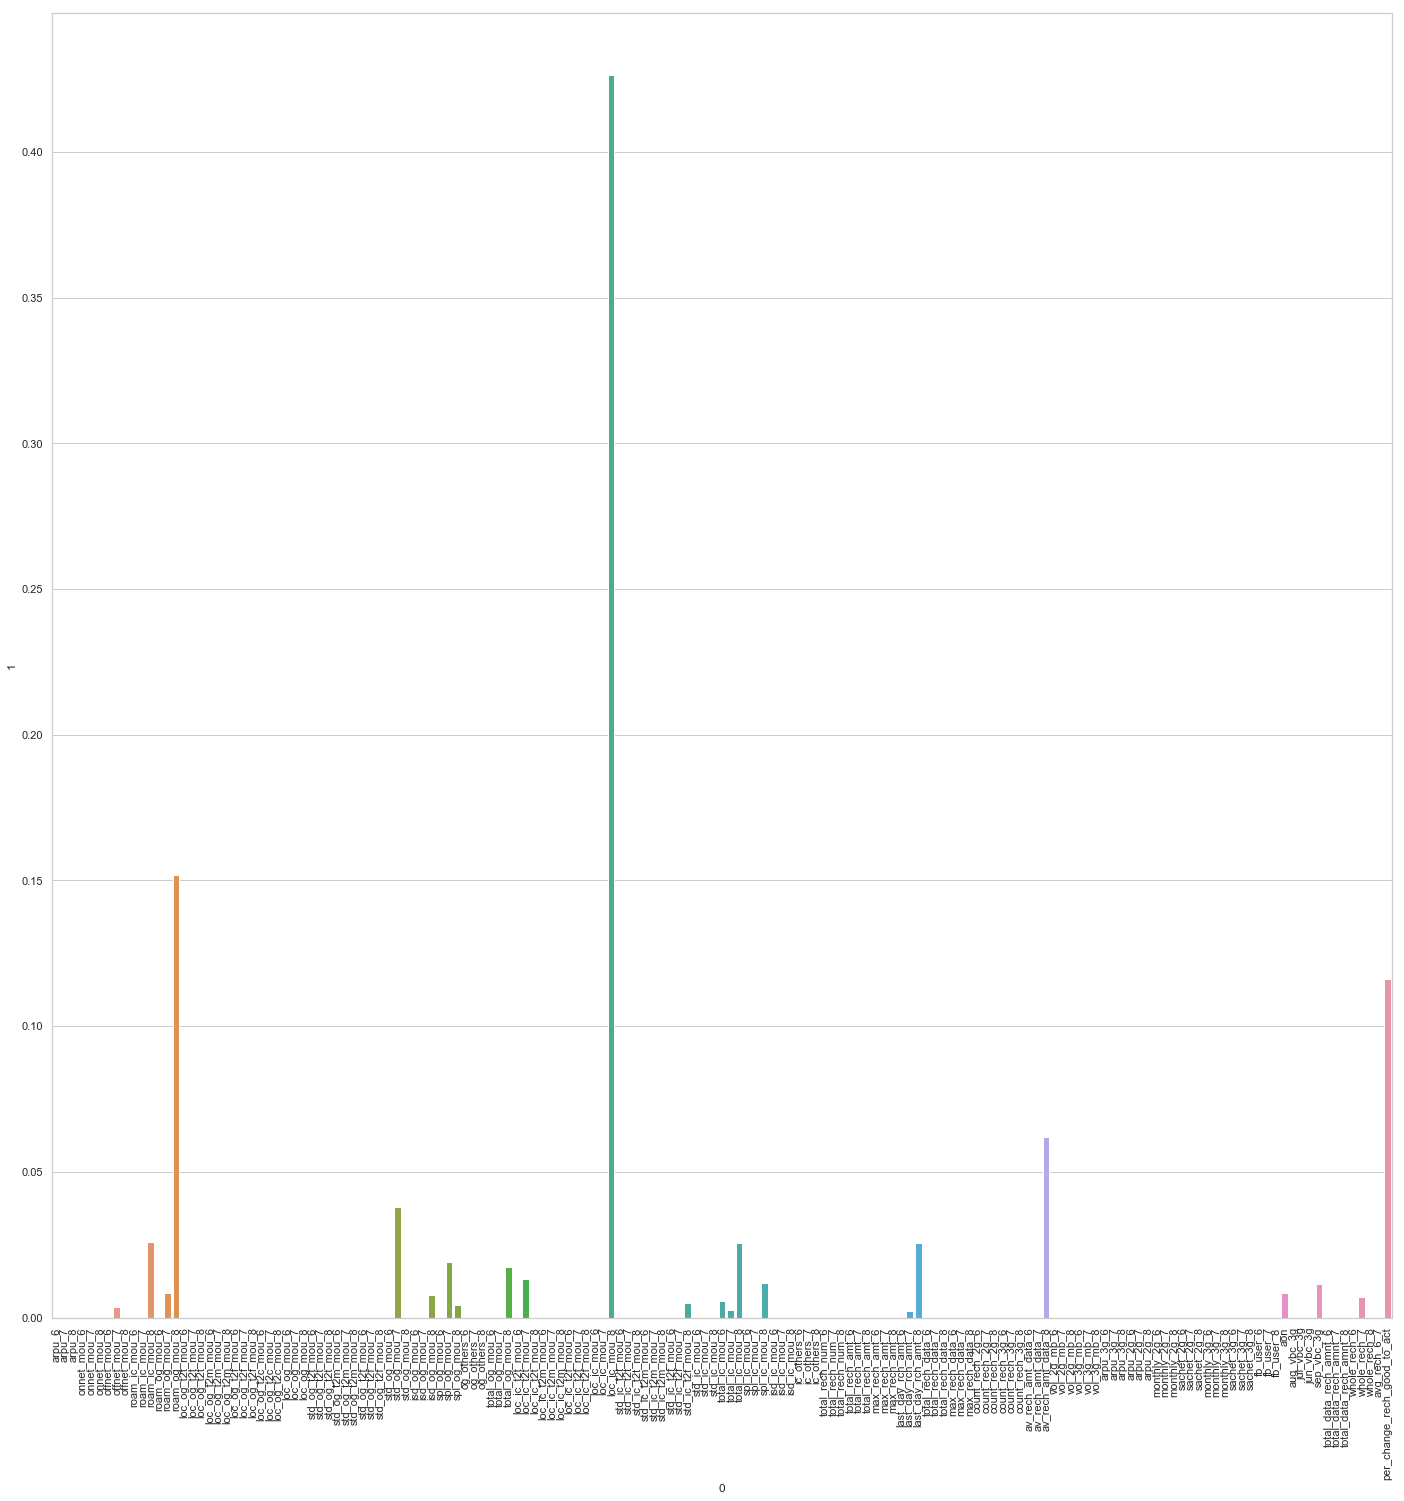

In [140]:
import seaborn as sns
sns.set(rc={'figure.figsize':(24,24)})
sns.set(style="whitegrid")
plt.xticks(rotation='vertical')
ax = sns.barplot(x=0, y=1, data=feat)

*From above observations, Below are the important features<br>
loc_ic_mou_8<br>
roam_og_mou_8<br>
per_change_rech_good_to_act<br>
av_rech_amt_data_8<br>
std_og_mou_7<br>
roam_ic_mou_8<br>
total_ic_mou_8<br>
last_day_rch_amt_8<br>
spl_og_mou_7<br>
total_og_mou_8<br>
loc_ic_t2t_mou_7*

In [142]:
## Let's also check logistic model

In [97]:
from sklearn.linear_model import LogisticRegression
logregs1 = LogisticRegression(class_weight = {0:0.05, 1: 0.95})

In [ ]:
## Select top 30 features through RFE

In [105]:
from sklearn.feature_selection import RFE
rfe1 = RFE(logregs1, 30)             # running RFE with 30 variables as output
rfea = rfe1.fit(X_train1, Y_train1)

In [106]:
cols = X_train1.columns[rfea.support_]
## Let's filter the dataset with the significant columns alone

X_trainf = X_train1[cols]

In [108]:
## Let's build logistic model with these top 30 feature

X_traina_sm = sm.add_constant(X_trainf)
logma = sm.GLM(Y_train1,X_traina_sm, family = sm.families.Binomial())
resa = logma.fit()
resa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22768
Model:                            GLM   Df Residuals:                    22737
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3568.2
Date:                Mon, 13 May 2019   Deviance:                       7136.4
Time:                        20:12:17   Pearson chi2:                 1.50e+05
No. Iterations:                    10   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.3920      0.082    -53.359      0.000      -4.553      -4.231
arpu_7                          0.2738      0.103      2.648      0.008       0.071       0.476
arpu_8                          0.2741      0.088      3.109      0.002       0.101       0.447
onnet_mou_7                     0.3280      0.138      2.375      0.018       0.057       0.599
roam_og_mou_7                   0.1645      0.024      6.990      0.000       0.118       0.211
loc_og_t2t_mou_8               -0.1446      0.131     -1.106      0.269      -0.401       0.112
loc_og_t2m_mou_8               -0.2631      0.105     -2.498      0.012      -0.469      -0.057
std_og_t2t_mou_7               -0.0951      0.125     -0.761      0.447      -0.340       0.150
std_og_t2m_mou_7                0.1986      0.037      5.335      0.000       0.126       0.272
isd_og_mou_8                   -0.3044      0.115     -2.647      0.008      -0.530      -0.079
total_og_mou_8                 -0.6465      0.083     -7.825      0.000      -0.808      -0.485
loc_ic_t2m_mou_7                0.3642      0.072      5.024      0.000       0.222       0.506
loc_ic_t2m_mou_8               -0.3828      0.282     -1.358      0.175      -0.936       0.170
loc_ic_mou_8                   -1.1966      0.353     -3.388      0.001      -1.889      -0.504
std_ic_t2t_mou_7                0.1470      0.049      3.020      0.003       0.052       0.242
std_ic_t2t_mou_8               -0.0177      0.451     -0.039      0.969      -0.901       0.866
std_ic_t2m_mou_8                0.4073      0.620      0.657      0.511      -0.807       1.621
std_ic_mou_8                   -0.6994      0.827     -0.846      0.398      -2.320       0.921
total_ic_mou_6                  0.2031      0.055      3.665      0.000       0.094       0.312
total_ic_mou_8                 -0.2585      0.257     -1.006      0.315      -0.762       0.245
total_rech_amt_7               -0.1670      0.095     -1.766      0.077      -0.352       0.018
max_rech_amt_8                  0.2486      0.048      5.211      0.000       0.155       0.342
last_day_rch_amt_8             -0.4307      0.061     -7.048      0.000      -0.550      -0.311
av_rech_amt_data_6             -0.3392      0.078     -4.327      0.000      -0.493      -0.186
arpu_2g_6                       0.2488      0.075      3.316      0.001       0.102       0.396
monthly_2g_8                   -0.2734      0.076     -3.581      0.000      -0.423      -0.124
monthly_3g_8                   -0.2531      0.090     -2.798      0.005      -0.430      -0.076
fb_user_8                      -0.3591      0.051     -7.071      0.000      -0.459      -0.260
aon                            -0.2003      0.042     -4.797      0.000      -0.282      -0.118
sep_vbc_3g                     -1.0712      0.270     -3.965      0.000      -1.601      -

*Above model looks good and not seeing much high 'P' values*<br>

*Below are the top 10 features with high coefficients<br>
per_change_rech_good_to_act<br>
loc_ic_mou_8<br>
sep_vbc_3g<br>
std_ic_mou_8<br>
total_og_mou_8<br>
last_day_rch_amt_8<br>
std_ic_t2m_mou_8<br>
loc_ic_t2m_mou_8<br>
loc_ic_t2m_mou_7<br>
av_rech_amt_data_6*


**Below are the final top features after considering logistic and Decision tree model**<br>
*av_rech_amt_data_6<br>
fb_user_8<br>
last_day_rch_amt_8<br>
loc_ic_mou_8<br>
loc_ic_t2m_mou_7<br>
loc_ic_t2m_mou_8<br>
per_change_rech_good_to_act<br>
sep_vbc_3g<br>
std_ic_mou_8<br>
std_ic_t2m_mou_8<br>
total_og_mou_8<br>
av_rech_amt_data_8<br>
loc_ic_t2t_mou_7<br>
roam_ic_mou_8<br>
roam_og_mou_8<br>
spl_og_mou_7<br>
std_og_mou_7<br>
total_ic_mou_8<br>
<br>
1. Most of the features are from 8th month or action month<br>
2. Most of the features are related to recharges<br>
3. One more important feature is '% revenue dip from good phase to action pahse'(This is derived feature in the starting)*

**Recommendations from our team to manage churn**<br>
1. When we observe good percentage of revenue dip from a customer from previous month to current month call him and know the reasons.<br>
2. As most of the important drivers of churn are from action phase, Customer care should contact the customer asap and know the reasons from customer.<br>
3. If customer is not happy with tariff plans provide him better plans but it should be within limits. Means it shoud be economical to the telecom company. Otherwise no meaning in holding the customer.<br>
4. Better to know the attractive plans of other telecom networks and implement them in our network before customers attracted towards other networks.<br>
5. Provide the customers attractive combo packages like data+call, roaming+data.These things may keep the customers happy in the network. <br>
6. Try to provide data offers on data usage on the social networking sites like Facebook,Twitter etc which are the 21st century seductives of people.